<a href="https://colab.research.google.com/github/sakuragav/CIS350/blob/Assignments/Group5_352Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Importing and Processing Datasets:


spotting null values and makign data workable




In [ ]:
customeraq = pd.read_csv('https://raw.githubusercontent.com/rishika1444/Credit-Card-Case-Study/master/Customer%20Acqusition.csv')
spend = pd.read_csv('https://raw.githubusercontent.com/rishika1444/Credit-Card-Case-Study/master/spend.csv')
repayment = pd.read_csv('https://raw.githubusercontent.com/rishika1444/Credit-Card-Case-Study/master/Repayment.csv')


In [ ]:
customeraq

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [ ]:
spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [ ]:
repayment.head(10) #has a column with null values that can be dropped


,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
5,6.0,A1,23-Feb-05,365366.62,NaN
6,7.0,A1,1-Feb-05,14473.41,NaN
7,8.0,A8,5-Feb-04,156913.59,NaN
8,9.0,A9,28-Feb-05,417294.81,NaN
9,10.0,A10,16-Feb-05,48759.19,NaN


In [ ]:
spenddf = pd.merge(customeraq, spend, on='Customer')
repaydf = pd.merge(customeraq, repayment, on='Customer')
repaydf = repaydf.drop(columns= ['Unnamed: 4'])
spenddf['Month']=pd.to_datetime(spenddf['Month'])
repaydf['Month']=pd.to_datetime(repaydf['Month'])

In [ ]:
spenddf

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,139018.26
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,284521.06
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,90184.22


In [ ]:
repaydf

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,2004-01-12,495414.75
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,2004-01-03,245899.02
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,2004-01-15,259490.06
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,2004-01-25,437555.12
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98.0,2004-01-25,310992.30
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,99.0,2004-01-12,121874.90
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100.0,2004-01-03,337815.57
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,101.0,2004-01-15,25682.73


# 1. What is the average monthly repayment by customers?

In [ ]:
ary = repaydf['Customer'].unique()

In [ ]:
repaydf[['Month','Customer','Amount']].groupby(['Customer', 'Month']).mean()
#repaydf['Month']




Amount
Customer Month                 
A1       2004-01-03  245899.020
         2004-01-12  422930.785
         2004-01-15  356258.850
         2004-01-25  437555.120
         2004-02-05  117964.430
...                         ...
A95      2004-01-15  369405.960
A96      2004-01-25  310992.300
A97      2004-01-12  121874.900
A98      2004-01-03  337815.570
A99      2004-01-15   25682.730

[1281 rows x 1 columns]

This code was able to find the mean of each customer in relationship with each month. But we can now goahead and find mean once again, this procudes mean amounts with respect to the customer and the amount over all the months.

In [ ]:
repaydf.groupby('Customer').mean().sort_values('Amount', ascending = False).head(10)

<ipython-input-11-d80268546dce>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  repaydf.groupby('Customer').mean().sort_values('Amount', ascending = False).head(10)


,No,Age,Limit,SL No:,Amount
Customer,,,,,
A89,89.0,72.0,500000.0,91.000000,497237.97
A75,75.0,36.0,100003.0,77.000000,481338.08
A80,80.0,39.0,500000.0,82.000000,481205.64
A84,84.0,70.0,100000.0,86.000000,464121.13
A87,87.0,27.0,100003.0,89.000000,462283.02
A92,92.0,78.0,500000.0,94.000000,459105.69
A70,70.0,16.0,10001.0,785.500000,390827.94
A95,95.0,62.0,500000.0,97.000000,369405.96
A65,65.0,41.0,500000.0,780.500000,349794.97


<Axes: xlabel='No', ylabel='Amount'>

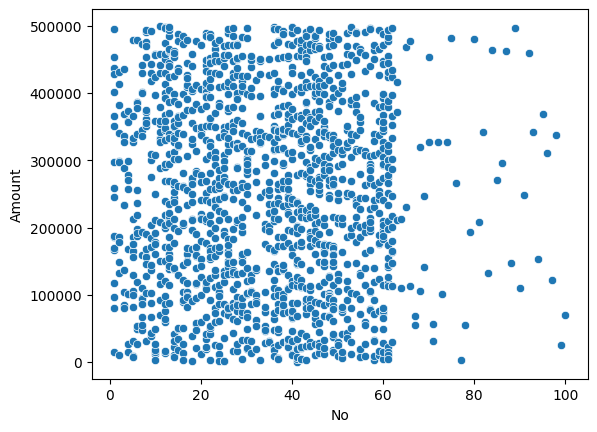

In [ ]:
sns.scatterplot(data=repaydf,x=repaydf.No,y=repaydf.Amount)

# 2. Who are the top 10 customers in terms of repayment?

In [ ]:
repaydf[['Customer','Amount']].groupby('Customer').sum().sort_values('Amount',ascending=False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A22,9372561.68
A21,9056336.15
A43,8489871.46
A45,8448334.87
A12,8334760.16
A48,8292416.75


we can now go ahead an create a bar plot to visualize the data.

<Axes: ylabel='Amount'>

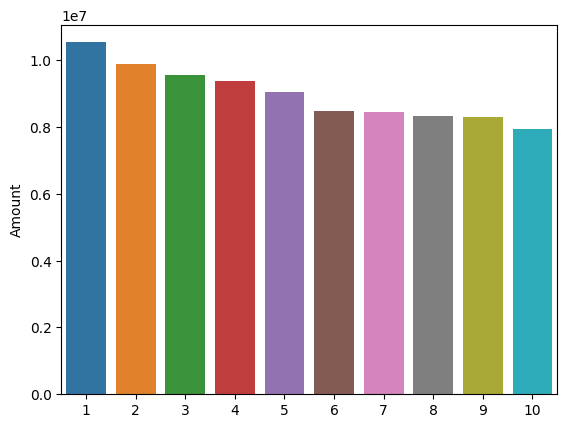

In [ ]:
plot1 = repaydf[['Customer','Amount']].groupby('Customer').sum().sort_values('Amount',ascending=False).head(10)

rank = [i for i in range(1,11)]

sns.barplot(x = rank, y = plot1['Amount'])

# 3. Which city is having the maximum spend?

In [ ]:
spenddf.groupby('City').sum().sort_values('Amount',ascending=False)

<ipython-input-14-9edb8cd5191f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  spenddf.groupby('City').sum().sort_values('Amount',ascending=False)


,No,Age,Limit,Sl No:,Amount
City,,,,,
COCHIN,10482,13191,95750182.0,226380,73495349.26
BANGALORE,8323,12250,84970247.0,185872,69342631.62
CALCUTTA,9398,10520,80150127.0,192958,64415760.01
BOMBAY,6986,10244,60090128.0,159026,50828266.74
CHENNAI,4905,5756,41810055.0,107785,32674988.07
TRIVANDRUM,4855,5502,31520052.0,104061,25761239.41
PATNA,3573,4811,29000036.0,74935,24609274.54
DELHI,3371,4129,23700108.0,74733,23516564.54


Now that we were able to obtain the top 10 cities, we can go ahead and visualize this using bar plot. But The city column moved into the axis and so it need to be reset before graphing.

<ipython-input-15-05b32239254b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot2 = spenddf.groupby('City').sum().sort_values('Amount',ascending=False)


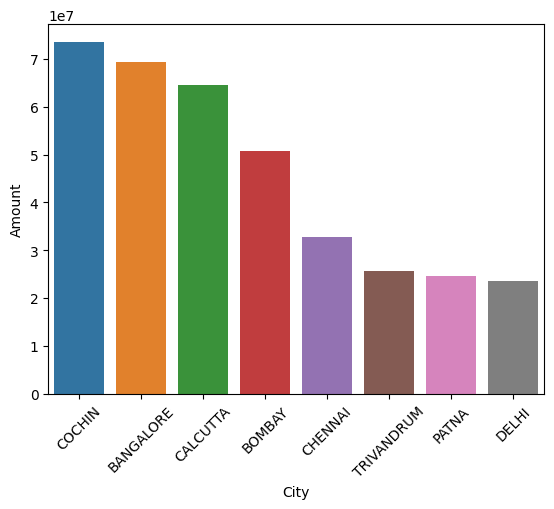

In [ ]:
plot2 = spenddf.groupby('City').sum().sort_values('Amount',ascending=False)
plot2 = plot2.reset_index()

top10cities = sns.barplot(x = "City", y = 'Amount', data = plot2) #looks like the lables are overlapping, therefore they need to be rotated.

top10cities.set_xticklabels(top10cities.get_xticklabels(), rotation=45) #applying rotation.
plt.show()

# 4. Write user defined PYTHON function to perform the following analysis:
 - You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month.
 - The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly)
 - The function should automatically take these inputs while identifying
the top 10 customers

In [ ]:
def topten(product, time):
  if time == 'yearly':
    repaydf['yearly'] = repaydf['Month'].apply(lambda x: x.year)
    return repaydf.loc[(repaydf['Product'] == product)].groupby(['Customer','City','Product',time]).sum('Amount').sort_values('Amount',ascending=False).head(10)
  elif time == 'monthly':
    repaydf['monthly'] = repaydf['Month'].apply(lambda x: x.month)
    return repaydf.loc[(repaydf['Product'] == product)].groupby(['Customer','City','Product',time]).sum('Amount').sort_values('Amount',ascending=False).head(10)

product = input("Product type: ")
time = input("monthly/yearly: ")
topten(product, time)

Product type: Gold
monthly/yearly: monthly


,,,,No,Age,Limit,SL No:,Amount
Customer,City,Product,monthly,,,,,
A61,COCHIN,Gold,4,610,440,5000000.0,12838.0,3412860.60
A42,BOMBAY,Gold,5,420,500,5000000.0,9434.0,3305341.39
A30,BANGALORE,Gold,5,300,250,5000000.0,5619.0,3086549.14
A29,CALCUTTA,Gold,5,290,720,5000000.0,5761.0,2612139.63
A42,BOMBAY,Gold,1,378,450,4500000.0,8437.0,2516249.24
A60,CALCUTTA,Gold,1,600,280,5000000.0,11648.0,2465584.81
A44,DELHI,Gold,1,352,224,4000000.0,7791.0,2415712.91
A1,BANGALORE,Gold,1,7,532,3500000.0,346.0,2407806.29
A60,CALCUTTA,Gold,4,480,224,4000000.0,10193.0,2397565.91
